In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
#cheing frequency for b and m
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
#checking for null values
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [5]:
#Preparing input and output 
#Drop the Id and diagnosis columns
X=data.drop(['id','diagnosis'],axis=1)

In [6]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [7]:
#Accessing output column
y=data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

#### Train-Test-Split:

In [10]:
#preparing test and training data
#storing 70% of the data(569 rows) into training and remaining 30% of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

In [12]:
#shape of training data and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


#### Scaling the Data 

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.0654828 , -1.35518629,  0.03134589, ..., -0.04689041,
         0.3683001 , -1.22806684],
       [-0.77639967, -0.1225787 , -0.77192193, ..., -0.39868555,
         0.3648074 , -0.83648993],
       [-0.84936282, -1.05782571, -0.87563499, ..., -1.03880764,
        -1.65746674, -0.54459715],
       ...,
       [-0.88303812, -0.35998755, -0.85204535, ..., -0.1993652 ,
        -0.98162901, -0.01313199],
       [ 1.07854805,  0.213151  ,  0.91351698, ...,  0.10120204,
         3.54665843, -1.20658794],
       [-0.26846391, -0.90674734, -0.26149099, ..., -0.22037015,
         1.74267813,  0.1823811 ]])

#### Creating DataFrame out of array

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.065483,-1.355186,0.031346,-0.035592,0.240960,-0.482979,-0.357708,-0.046272,1.043490,-1.165341,...,0.125178,-1.425939,0.117536,0.004168,-0.067496,-0.603330,-0.480560,-0.046890,0.368300,-1.228067
1,-0.776400,-0.122579,-0.771922,-0.735368,0.647407,-0.311306,-0.538400,-0.554964,0.487938,-0.040111,...,-0.762720,-0.388938,-0.811034,-0.683149,0.750316,-0.570666,-0.484590,-0.398686,0.364807,-0.836490
2,-0.849363,-1.057826,-0.875635,-0.787151,0.348139,-0.852027,-0.784787,-0.557750,-0.867159,0.635322,...,-0.993986,-1.439473,-1.023193,-0.826151,-0.423640,-1.070632,-1.104405,-1.038808,-1.657467,-0.544597
3,-0.495772,1.855828,-0.430686,-0.494085,0.543011,0.675764,0.293648,-0.056654,0.547997,1.030554,...,-0.106089,2.370196,-0.140978,-0.177502,2.078160,1.517193,0.926643,0.515256,0.635492,2.064263
4,-0.540673,-1.208904,-0.589306,-0.538871,-1.270688,-1.348603,-0.942352,-1.083888,-0.465510,-0.868918,...,-0.684254,-1.498682,-0.738234,-0.623056,-1.368960,-1.264486,-1.095436,-1.409643,-0.974644,-1.247343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.601481,0.093248,0.734561,0.453131,0.487333,1.735231,1.756211,1.116199,1.328773,0.501121,...,0.253200,-0.385555,0.465193,0.119998,0.284251,1.354538,1.668284,0.992779,0.815366,0.459404
394,1.594903,1.438564,1.572400,1.506153,0.410777,1.138790,2.148854,1.697561,1.520214,-0.184636,...,1.335196,1.395787,1.255592,1.250953,-0.164226,0.953898,1.555425,0.927800,0.792663,0.089857
395,-0.883038,-0.359988,-0.852045,-0.807025,0.088542,-0.065471,-0.416287,-0.505842,-0.668211,0.250414,...,-0.938234,0.199767,-0.891856,-0.806991,0.508490,0.053292,-0.233178,-0.199365,-0.981629,-0.013132
396,1.078548,0.213151,0.913517,0.918342,-0.805780,-0.659950,-0.158337,0.205162,1.246191,-1.789158,...,0.911896,0.423069,0.676164,0.679640,-1.056784,-0.818649,-0.169695,0.101202,3.546658,-1.206588


#### Scaling for Training Data and Testing Data

In [16]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#data scaling(training data)
scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.065483,-1.355186,0.031346,-0.035592,0.240960,-0.482979,-0.357708,-0.046272,1.043490,-1.165341,...,0.125178,-1.425939,0.117536,0.004168,-0.067496,-0.603330,-0.480560,-0.046890,0.368300,-1.228067
1,-0.776400,-0.122579,-0.771922,-0.735368,0.647407,-0.311306,-0.538400,-0.554964,0.487938,-0.040111,...,-0.762720,-0.388938,-0.811034,-0.683149,0.750316,-0.570666,-0.484590,-0.398686,0.364807,-0.836490
2,-0.849363,-1.057826,-0.875635,-0.787151,0.348139,-0.852027,-0.784787,-0.557750,-0.867159,0.635322,...,-0.993986,-1.439473,-1.023193,-0.826151,-0.423640,-1.070632,-1.104405,-1.038808,-1.657467,-0.544597
3,-0.495772,1.855828,-0.430686,-0.494085,0.543011,0.675764,0.293648,-0.056654,0.547997,1.030554,...,-0.106089,2.370196,-0.140978,-0.177502,2.078160,1.517193,0.926643,0.515256,0.635492,2.064263
4,-0.540673,-1.208904,-0.589306,-0.538871,-1.270688,-1.348603,-0.942352,-1.083888,-0.465510,-0.868918,...,-0.684254,-1.498682,-0.738234,-0.623056,-1.368960,-1.264486,-1.095436,-1.409643,-0.974644,-1.247343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.601481,0.093248,0.734561,0.453131,0.487333,1.735231,1.756211,1.116199,1.328773,0.501121,...,0.253200,-0.385555,0.465193,0.119998,0.284251,1.354538,1.668284,0.992779,0.815366,0.459404
394,1.594903,1.438564,1.572400,1.506153,0.410777,1.138790,2.148854,1.697561,1.520214,-0.184636,...,1.335196,1.395787,1.255592,1.250953,-0.164226,0.953898,1.555425,0.927800,0.792663,0.089857
395,-0.883038,-0.359988,-0.852045,-0.807025,0.088542,-0.065471,-0.416287,-0.505842,-0.668211,0.250414,...,-0.938234,0.199767,-0.891856,-0.806991,0.508490,0.053292,-0.233178,-0.199365,-0.981629,-0.013132
396,1.078548,0.213151,0.913517,0.918342,-0.805780,-0.659950,-0.158337,0.205162,1.246191,-1.789158,...,0.911896,0.423069,0.676164,0.679640,-1.056784,-0.818649,-0.169695,0.101202,3.546658,-1.206588


In [17]:
#data scaling(testing data)
scaled_X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.820383,-0.173809,-0.864054,-0.772484,-0.839113,-1.115846,-0.895059,-0.803603,0.581700,-0.557191,...,-0.867791,-0.052852,-0.896889,-0.798979,-1.019902,-1.079349,-1.007702,-0.923140,0.358435,-0.918749
1,-0.141927,-0.792820,-0.198179,-0.230883,-1.152495,-0.871458,-0.875741,-0.842076,0.091697,-0.935263,...,-0.349774,-0.954952,-0.300309,-0.418776,-1.077035,-0.417112,-0.746220,-0.800681,0.438508,-0.516902
2,1.127255,-0.621604,1.062181,0.984540,-0.660692,0.192327,0.150940,0.302088,-0.436534,-0.788529,...,0.807410,-0.679606,0.724717,0.699342,-0.382650,-0.081638,0.551709,0.505600,-0.249256,-0.219070
3,-0.981224,0.993971,-1.003433,-0.874237,-1.236369,-0.830667,-0.999770,-1.171264,0.453118,-0.064110,...,-0.727843,0.754930,-0.758478,-0.715669,-0.641946,-0.689611,-1.066559,-1.382204,0.061024,-0.559531
4,0.574547,-1.058424,0.501265,0.422529,-0.242850,-0.490922,-0.513499,-0.165548,-0.384406,-0.662945,...,0.249706,-1.050791,0.202296,0.080185,-0.633156,-0.637230,-0.321219,-0.128562,-0.340767,-0.908518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.916888,-0.625994,-0.917171,-0.839925,0.729320,-0.615620,-0.815449,-0.720426,-0.457386,-0.048247,...,-0.857347,-0.007215,-0.877674,-0.777207,0.083204,-0.778482,-0.869224,-0.731329,-0.026197,-0.414593
167,-0.109758,-0.854282,-0.088121,-0.216093,0.195580,0.278202,-0.231850,-0.018971,-0.638096,0.250510,...,0.011585,-0.856071,0.034161,-0.163628,0.267788,0.433932,-0.114450,0.268179,-0.611011,0.960324
168,-0.694635,-0.531606,-0.732749,-0.666293,-0.553944,-0.896863,-0.839197,-0.948554,0.004817,-0.472587,...,-0.640114,-0.303858,-0.695427,-0.614186,-0.466152,-0.634876,-0.700811,-1.055439,-0.339337,-0.278182
169,2.215126,0.287157,2.328490,2.466473,-0.314523,1.496564,1.510580,1.555440,-0.433059,-0.241249,...,2.438746,0.257482,2.604231,2.664237,-0.343096,1.130187,1.220513,0.983564,-0.262125,0.140716


#### Fitting the Model

In [24]:
#Buliding Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
#applying KNN Object on the dataset(Training Phase)
#syntax:objectName.fit(Input,Output)
knn.fit(scaled_X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [28]:
#predictions on data
#predict Function-->gives the predicted values
#Syntax:objectname.predict(Input)
y_train_pred=knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

#### Classification Report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       257
           M       1.00      0.94      0.97       141

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.98      0.98       398



In [43]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.9473684210526315,
 0.9239766081871345,
 0.935672514619883,
 0.9298245614035088,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9473684210526315,
 0.9298245614035088,
 0.9415204678362573,
 0.9298245614035088,
 0.935672514619883,
 0.9239766081871345,
 0.9239766081871345,
 0.9239766081871345,
 0.9473684210526315,
 0.9239766081871345,
 0.935672514619883]

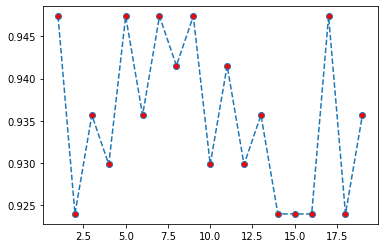

In [44]:
#ploting k values
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

In [36]:
#optimum value is 7
final_model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

#### Predicting with Xtrain

In [37]:
final_train_pred=final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

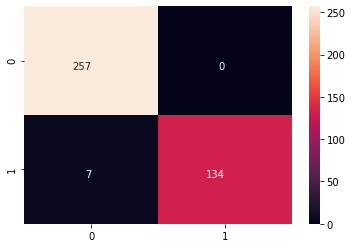

In [48]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d',annot_kws={'va':'top','ha':'right'})

In [49]:
#classification_report
#precision--->ppv--->out of the positive predicted values,how many are true values
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



#### Prediction on Test data

In [53]:
#predictions on test data
final_test_pred=final_model.predict(scaled_X_test) #y_test
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

#### Confusion Matrix

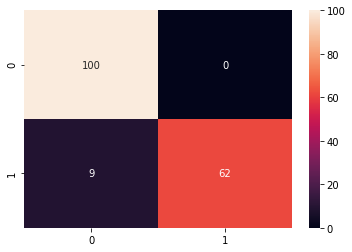

In [54]:
#compairing the actual values of the test data (y_test) and final_test_pred(model predicted values)
#confusion_matrix(actualvalues,predictedValues)
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')